In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of the CSV file
file = '../ignore/US_Accidents_May19.csv'
df = pd.read_csv(file)

#Source: https://www.fhwa.dot.gov/policyinformation/statistics/2017/
dl_file = '../ignore/US_DLCount.csv'
df_dlbystate = pd.read_csv(dl_file, thousands=',')

In [72]:
## Revised the csv exports slightly to meet header requirements.

#Read ACS CSVs
statepop_file = '../ignore/US_State_Population.csv'
df_statepop = pd.read_csv(statepop_file, encoding='iso-8859-1', thousands=',')

countypop_file = '../ignore/US_County_Population.csv'
df_countypop = pd.read_csv(countypop_file, encoding='iso-8859-1')

city_file = '../ignore/US_Cities_Population.csv'
df_citypop = pd.read_csv(city_file, encoding='iso-8859-1')

In [73]:
df.head()
df_statepop.head()
# df.count()

,Geographic Area,2010 Census,2010 Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55317240.0,55318443.0,55380134.0,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66927001.0,66929725.0,66974416.0,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114555744.0,114563030.0,114866680.0,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,71945553.0,71946907.0,72100436.0,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0


In [57]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

dfcl_dlbystate = df_dlbystate.replace({"Alaska 2/": "Alaska",
                                       "Hawaii 2/": "Hawaii",
                                       "Dist. of Col.": "District of Columbia"
                                      })
state_list = dfcl_dlbystate["STATE"].str.strip()
dfcl_dlbystate["STATE"] = state_list
dfcl_dlbystate = dfcl_dlbystate.replace({"STATE": us_state_abbrev})
dfcl_dlbystate.head()

,STATE,2015,2016,2017
0,AL,3907038,3943082,3954378
1,AK,533227,534585,534585
2,AZ,4978762,5082305,5164966
3,AR,2119578,2391103,2417464
4,CA,25532920,26199436,26777132


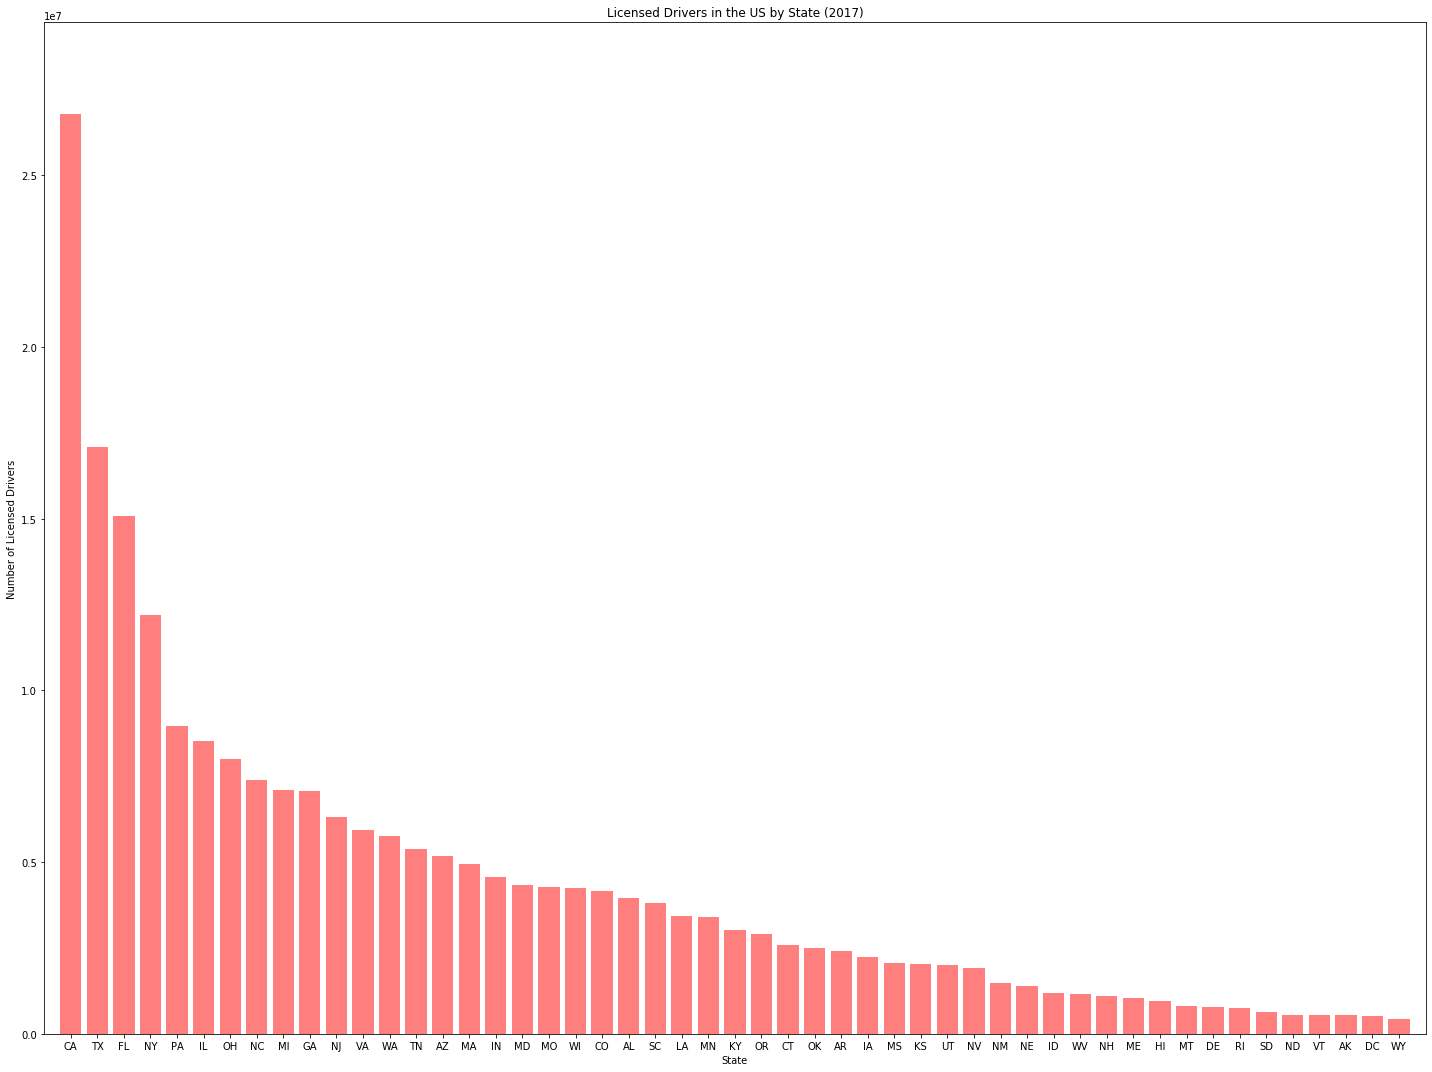

In [4]:
dl_2017 = dfcl_dlbystate[["STATE", "2017"]].sort_values("2017", ascending = False)
dl_2017 = dl_2017.reset_index(drop= True)

#drop the total row
dl_2017 = dl_2017.drop(0)

x_axis = np.arange(len(dl_2017["STATE"]))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(x_axis, dl_2017["2017"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, dl_2017["STATE"])

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max( dl_2017["2017"])*1.1)

# # Set a Title and labels
plt.title("Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("Number of Licensed Drivers")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_DL_byState.png")
plt.show()

###Add labels, fix y-ticks and ticklabels
###labels, design.. look at mapping

In [85]:
# Check the % of license drivers compared to total population
dfcl_statepop = df_statepop
dfcl_statepop['Geographic Area'] = dfcl_statepop['Geographic Area'].str.replace(".", "")
dfcl_statepop = dfcl_statepop [['Geographic Area', '2017']]

pop_state_list = dfcl_statepop["Geographic Area"].str.strip()
dfcl_statepop["Geographic Area"] = pop_state_list
dfcl_statepop = dfcl_statepop.replace({"Geographic Area": us_state_abbrev})

df_dlpop = dfcl_dlbystate[["STATE", "2017"]]
df_dlpop = pd.merge(df_dlpop, dfcl_statepop, how="left", left_on=["STATE"], right_on = "Geographic Area")
df_dlpop = df_dlpop.rename(columns={"2017_x": "2017 - DL", "2017_y": "2017 - POP"})
df_dlpop = df_dlpop[["STATE", "2017 - DL", "2017 - POP"]]
#Removes "TOTAL"
df_dlpop = df_dlpop.drop([51])
df_dlpop['2017 - POP'] = df_dlpop['2017 - POP'].astype(int)
df_dlpop["Perc_Drivers"] = df_dlpop["2017 - DL"] / df_dlpop["2017 - POP"] * 100
df_dlpop

C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,STATE,2017 - DL,2017 - POP,Perc_Drivers
0,AL,3954378,4874486,81.124000
1,AK,534585,739700,72.270515
2,AZ,5164966,7044008,73.324249
3,AR,2417464,3001345,80.546022
4,CA,26777132,39358497,68.033929
5,CO,4156138,5611885,74.059572
6,CT,2586994,3573297,72.397956
7,DE,770512,956823,80.528165
8,DC,521056,694906,74.982228
9,FL,15076358,20963613,71.916792


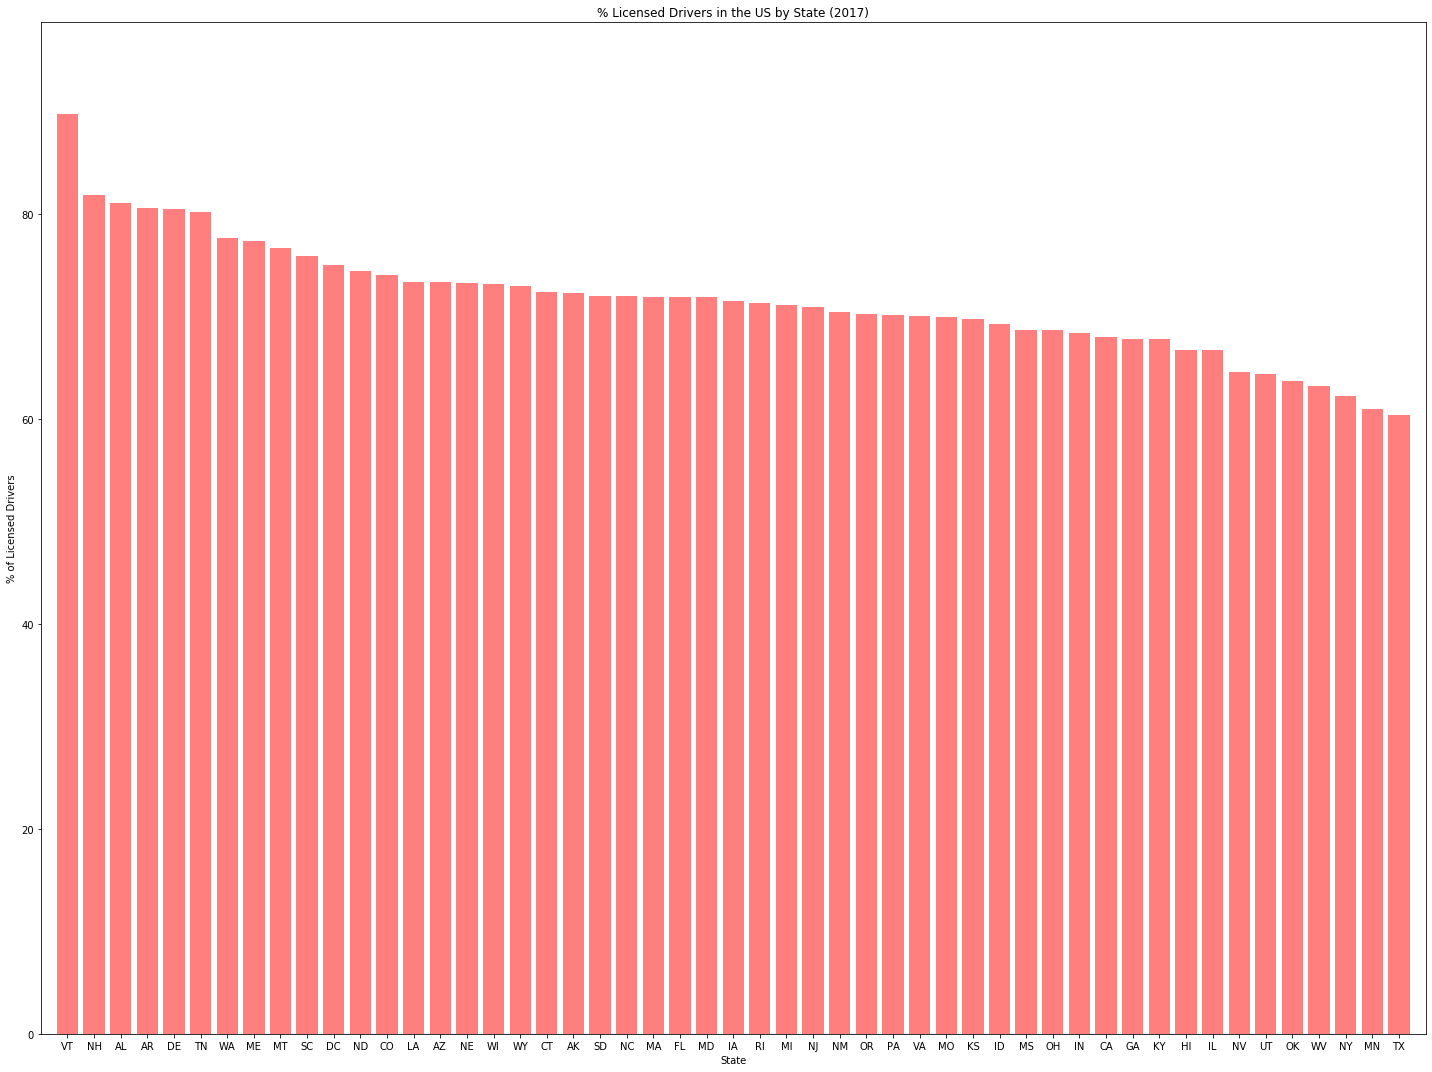

In [90]:
percdl_2017 = df_dlpop[["STATE", "Perc_Drivers"]].sort_values("Perc_Drivers", ascending = False)
percdl_2017 = percdl_2017.reset_index(drop= True)

x_axis = np.arange(len(percdl_2017["STATE"]))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(x_axis, percdl_2017["Perc_Drivers"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, percdl_2017["STATE"])

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(percdl_2017["Perc_Drivers"])*1.1)

# # Set a Title and labels
plt.title("% Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("% of Licensed Drivers")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_%DL_byState.png")
plt.show()

###Add labels, fix y-ticks and ticklabels
###labels, design.. look at mapping

In [ ]:
# Check population benchmark per county
dfcl_countypop = df_countypop
dfcl_countypop.columns = [x.strip().replace('Population Estimate (as of July 1) - ', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('April 1, ', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('Census', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('-', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('Estimates Base', '') for x in dfcl_countypop.columns]
df_countypop
# In the bar charts with county name, add the state in the name
# Normalize the charts by populations

In [5]:
#Create Relevant DataFrame
df_location = df[["ID", "Severity", "Start_Time", 
#                   "End_Time",  "Distance(mi)",
                  "City", "County", "State", "Timezone"]]
df_location.head()
# df_location.count()
#Recategorize the timestamp - year, month, time categories
df_location["Start_Year"] = df_location["Start_Time"].agg(lambda x: x.split("-")[0])
df_location["Start_Month"] = df_location["Start_Time"].agg(lambda x: x.split("-")[1])
df_location["Start_HrMin"] = df_location["Start_Time"].agg(lambda x: x.split()[1])
df_location["Start_Hr"] = df_location["Start_HrMin"].agg(lambda x: x.split(":")[0])
dfcl_location = df_location [["ID", "Severity", 
                              "Start_Year", "Start_Month", "Start_Hr",
                              "City", "County", "State", "Timezone"]]
dfcl_location.head()

C:\Users\heain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\heain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\heain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,ID,Severity,Start_Year,Start_Month,Start_Hr,City,County,State,Timezone
0,A-1,3,2016,02,05,Dayton,Montgomery,OH,US/Eastern
1,A-2,2,2016,02,06,Reynoldsburg,Franklin,OH,US/Eastern
2,A-3,2,2016,02,06,Williamsburg,Clermont,OH,US/Eastern
3,A-4,3,2016,02,07,Dayton,Montgomery,OH,US/Eastern
4,A-5,2,2016,02,07,Dayton,Montgomery,OH,US/Eastern


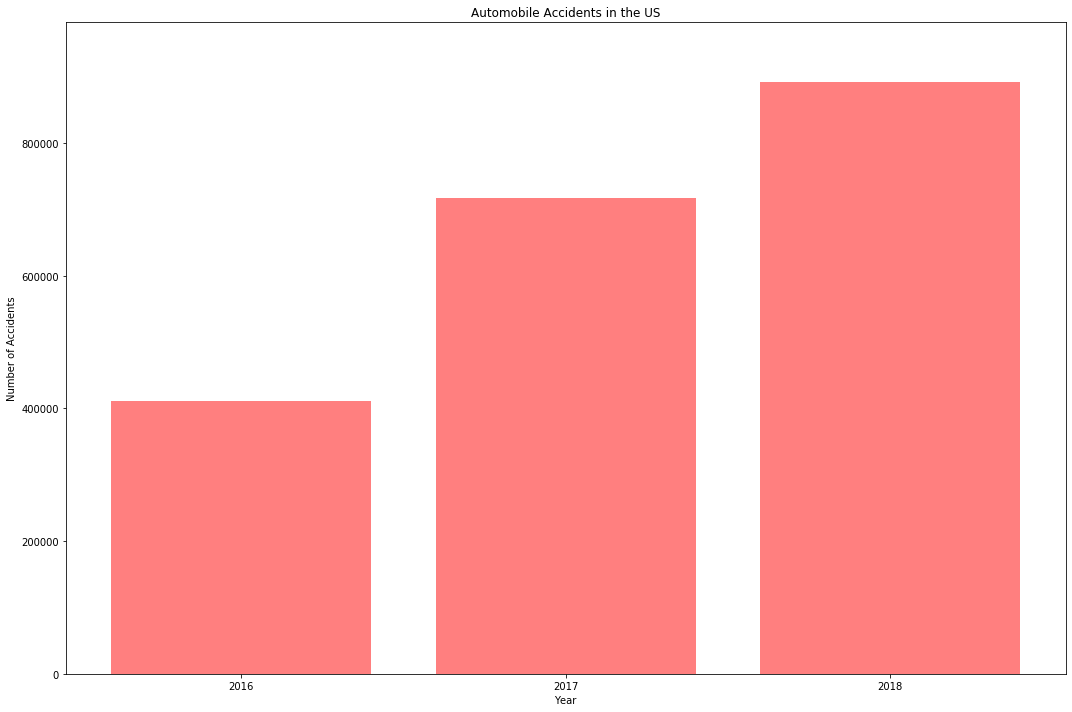

In [6]:
dfcl_2015_loc = dfcl_location.loc[dfcl_location["Start_Year"] == "2015", :]
dfcl_2016_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2016", :]
dfcl_2017_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2017", :]
dfcl_2018_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2018", :]
dfcl_2019_loc = dfcl_location.loc[dfcl_location["Start_Year"] == "2019", :]
# dfcl_2015_loc
# dfcl_2016_loc
# dfcl_2017_loc
# dfcl_2018_loc
# dfcl_2019_loc

# dfcl_2019_loc["Start_Month"].value_counts()
# dfcl_2018_loc["Start_Month"].value_counts()
# dfcl_2017_loc["Start_Month"].value_counts()
# dfcl_2016_loc["Start_Month"].value_counts()

#Remove 2015 going forward - only 1 accident.
#Remove 2019 going forward - only goes until April.
total_2016 = len (dfcl_2016_loc)
total_2017 = len (dfcl_2017_loc)
total_2018 = len (dfcl_2018_loc)

years = ["2016", "2017", "2018"]
total_accidents = [total_2016, total_2017, total_2018]

df_annualaccidents = pd.DataFrame ({"Year": years,
                                  "Accidents": total_accidents})

df_annualaccidents
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,10))
plt.bar(years, total_accidents, color='r', alpha=0.5, align="center")
plt.xticks(years, years)

# # Set x and y limits
plt.ylim(0, max(total_accidents)*1.1)

# # # Set a Title and labels
plt.title("Automobile Accidents in the US")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/AnnualUSAccidents.png")
plt.show()

###Format chart

In [36]:
# df_bystate
dfcl_state = dfcl_location[["Start_Year", "State", "ID"]]
count_state = dfcl_state.groupby(['Start_Year', 'State'])["ID"].count()
dfcl_state_year = pd.DataFrame({"Number of Accidents": count_state})
dfcl_state_year = dfcl_state_year.reset_index()
dfcl_state_year

,Start_Year,State,Number of Accidents
0,2015,OH,1
1,2016,AL,135
2,2016,AR,26
3,2016,AZ,2770
4,2016,CA,140456
...,...,...,...
192,2019,VT,58
193,2019,WA,3798
194,2019,WI,2188
195,2019,WV,150


In [38]:
#Accidents by State
dfcl_2017_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2017", :].sort_values("Number of Accidents", ascending = False)
dfcl_2017_state.head()

,Start_Year,State,Number of Accidents
53,2017,CA,152668
91,2017,TX,85538
58,2017,FL,60665
82,2017,NY,36879
75,2017,NC,34091


In [39]:
#Most Frequent Accident States in 2017
df_2017st_dlacc = pd.merge(dfcl_2017_state, dfcl_dlbystate, how="left", left_on=["State"], right_on = "STATE")
df_2017st_dlacc = df_2017st_dlacc[["Start_Year", "State", "Number of Accidents", "2017"]]
df_2017st_dlacc = df_2017st_dlacc.rename(columns={"2017": "Licensed Drivers"})
df_2017st_dlacc ["Accidents per 1,000 Drivers"] = df_2017st_dlacc["Number of Accidents"]/df_2017st_dlacc["Licensed Drivers"]*1000
df_2017st_dlacc = df_2017st_dlacc.sort_values("Accidents per 1,000 Drivers", ascending = False)
df_2017st_dlacc.head()

,Start_Year,State,Number of Accidents,Licensed Drivers,"Accidents per 1,000 Drivers"
5,2017,SC,28331,3810962,7.434081
0,2017,CA,152668,26777132,5.701432
1,2017,TX,85538,17099340,5.002415
4,2017,NC,34091,7389467,4.613459
25,2017,NE,6203,1404479,4.416584


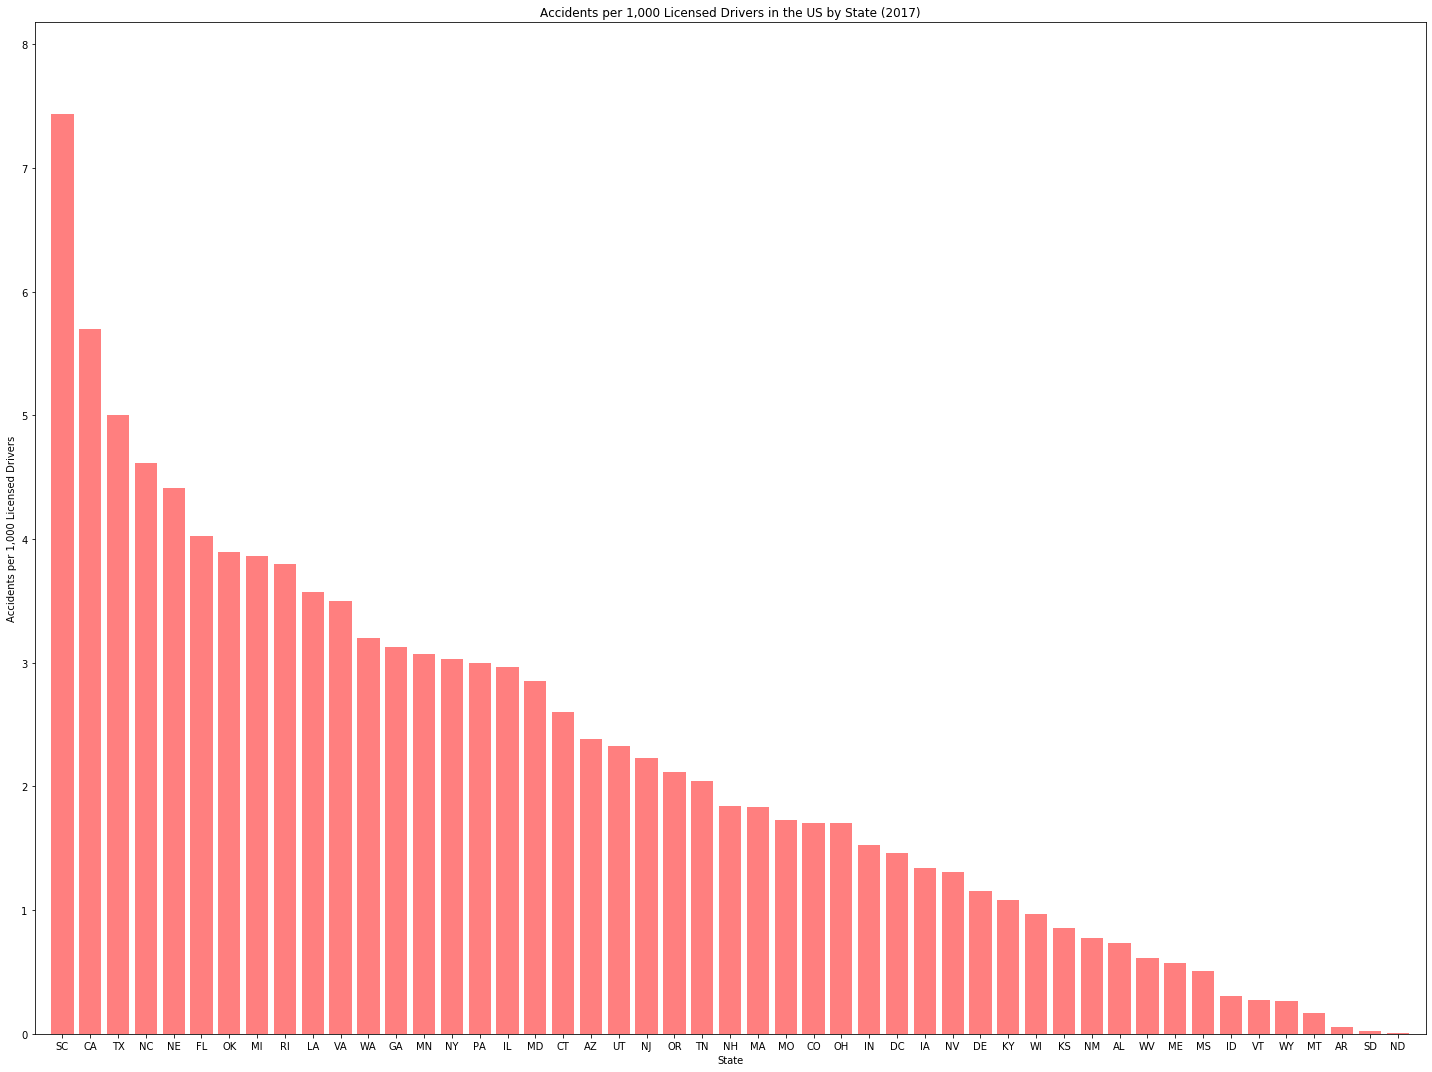

In [40]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(df_2017st_dlacc["State"], df_2017st_dlacc["Accidents per 1,000 Drivers"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(df_2017st_dlacc["State"]))
plt.ylim(0, max(df_2017st_dlacc["Accidents per 1,000 Drivers"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("Accidents per 1,000 Licensed Drivers")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperDrivers_byState.png")
plt.show()

###labels, design.. look at mapping

In [49]:
# df_bytimezone (This is from the original data set)
dfcl_timezone = dfcl_location[["Start_Year", "Timezone", "ID"]]
count_timezone = dfcl_timezone.groupby(['Start_Year', 'Timezone'])["ID"].count()
dfcl_timezone_year = pd.DataFrame({"Number of Accidents": count_timezone})
dfcl_timezone_year = dfcl_timezone_year.reset_index()
dfcl_timezone_year

,Start_Year,Timezone,Number of Accidents
0,2015,US/Eastern,1
1,2016,US/Central,86791
2,2016,US/Eastern,165558
3,2016,US/Mountain,5732
4,2016,US/Pacific,152373
5,2017,US/Central,177960
6,2017,US/Eastern,331214
7,2017,US/Mountain,27656
8,2017,US/Pacific,180140
9,2018,US/Central,230197


In [45]:
#Accidents by Timezone

# Create timezone data frame -- this analysis had to be redone to compare with Dept of T data, which is organized by state.
df_timezone = dfcl_location
df_timezone = df_timezone.drop_duplicates(subset = 'State', keep = 'first')
df_timezone = df_timezone[["State", "Timezone"]]
df_timezone

# merged data set with state and timezone
df_2017tz_dlacc_setup = pd.merge(df_2017st_dlacc, df_timezone, how="left", on=["State"])
df_2017tz_dlacc_setup = df_2017tz_dlacc_setup.drop("Accidents per 1,000 Drivers", axis = 1)

#groupby
groupby_tzaccidents = df_2017tz_dlacc.groupby("Timezone")["Number of Accidents"].sum()
groupby_tzld = df_2017tz_dlacc.groupby("Timezone")["Licensed Drivers"].sum()
df_2017tz_dlacc = pd.DataFrame ({"Number of Accidents" : groupby_tzaccidents,
                                "Licensed Drivers": groupby_tzld})
df_2017tz_dlacc= df_2017tz_dlacc.sort_values("Number of Accidents", ascending = False)
df_2017tz_dlacc.head()

,Number of Accidents,Licensed Drivers
Timezone,,
US/Eastern,335169,107961039
US/Pacific,179786,37374310
US/Central,176714,63315481
US/Mountain,25821,15209834


In [54]:
#Most Frequent Accident Timezones in 2017
df_2017tz_dlacc ["Accidents per 1,000 Drivers"] = df_2017tz_dlacc["Number of Accidents"]/df_2017tz_dlacc["Licensed Drivers"]*1000
df_2017tz_dlacc = df_2017tz_dlacc.sort_values("Accidents per 1,000 Drivers", ascending = False)
df_2017tz_dlacc = df_2017tz_dlacc.reset_index()
df_2017tz_dlacc.head()

,Timezone,Number of Accidents,Licensed Drivers,"Accidents per 1,000 Drivers"
0,US/Pacific,179786,37374310,4.810417
1,US/Eastern,335169,107961039,3.104537
2,US/Central,176714,63315481,2.791008
3,US/Mountain,25821,15209834,1.697652


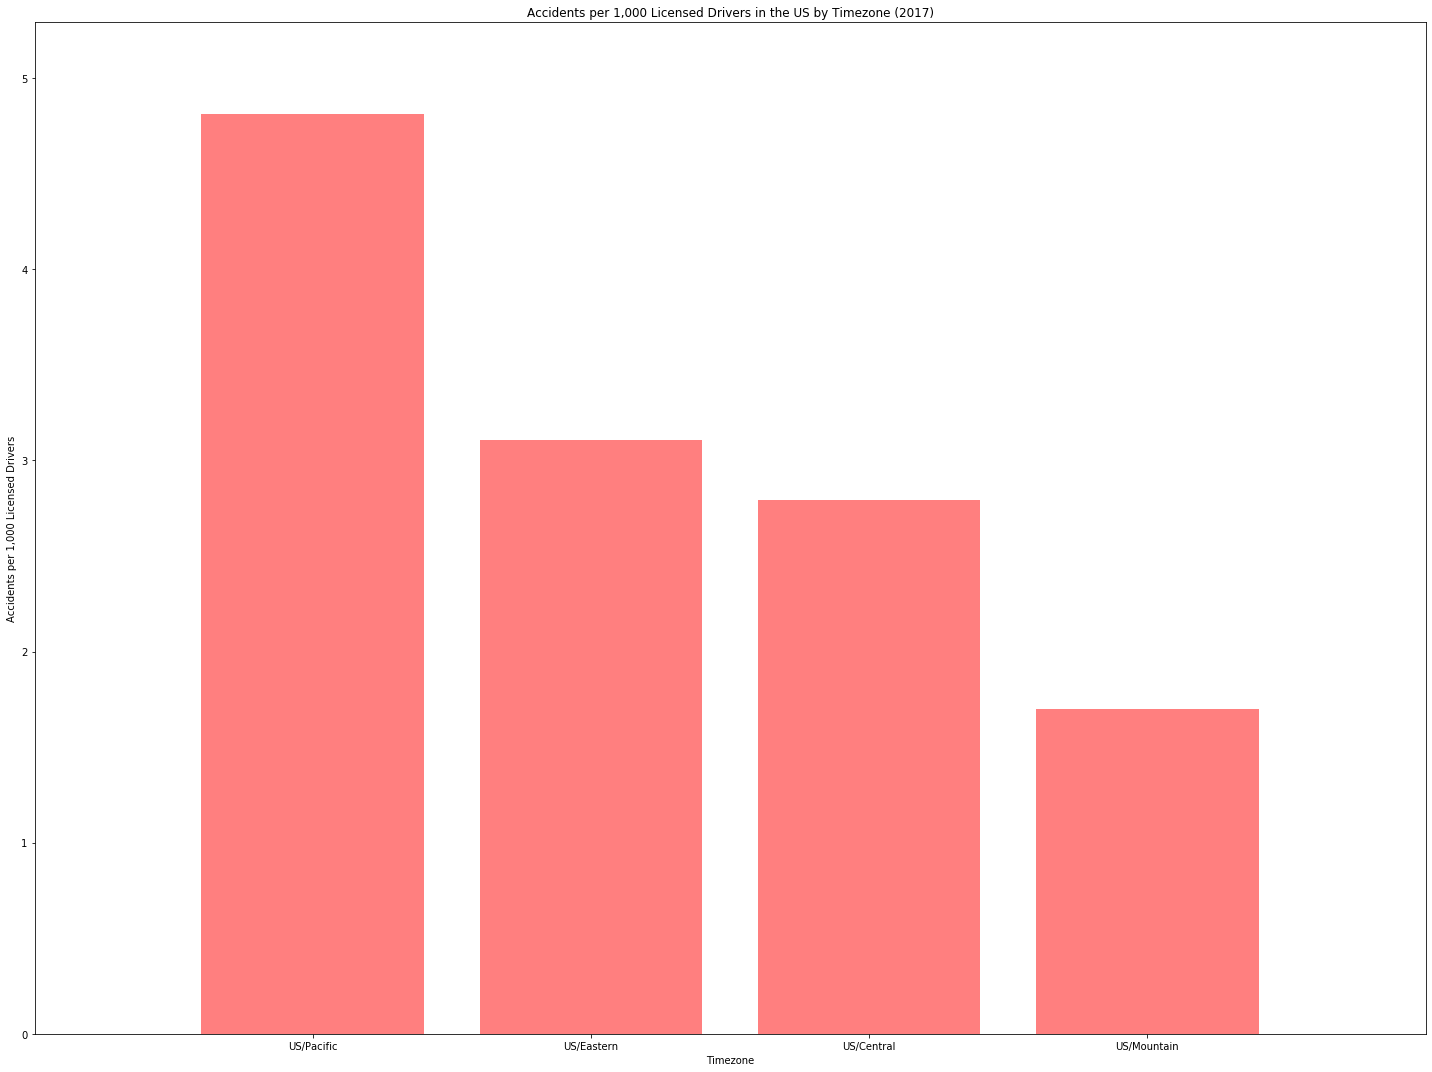

In [55]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(df_2017tz_dlacc["Timezone"], df_2017tz_dlacc["Accidents per 1,000 Drivers"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(df_2017tz_dlacc["Timezone"]))
plt.ylim(0, max(df_2017tz_dlacc["Accidents per 1,000 Drivers"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Licensed Drivers in the US by Timezone (2017)")
plt.xlabel("Timezone")
plt.ylabel("Accidents per 1,000 Licensed Drivers")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperDrivers_byTimezone.png")
plt.show()


###labels, design.. look at mapping

In [106]:
#Accidents by County in 2016, 2017, 2018
# df_bycounty
dfcl_county = dfcl_location[["Start_Year", "County", "ID"]]
count_county = dfcl_county.groupby(['Start_Year', 'County'])["ID"].count()
dfcl_county_year = pd.DataFrame({"Number of Accidents": count_county})
dfcl_county_year = dfcl_county_year.reset_index()
# dfcl_county_year

dfcl_2016_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

#Clean 2016 DataFrame
dfcl_county = dfcl_2016_county.rename(columns={"Number of Accidents": "Number of Accidents in 2016"}).drop("Start_Year", axis = 1)
#Merge and Clean 2017 DataFrame
dfcl_county = pd.merge(dfcl_county, dfcl_2017_county, how="outer", on = "County")
dfcl_county = dfcl_county.rename(columns={"Number of Accidents": "Number of Accidents in 2017"}).drop("Start_Year", axis = 1)
#Merage and Clean 2018 DataFrame
dfcl_county = pd.merge(dfcl_county, dfcl_2018_county, how="outer", on = "County")
dfcl_county = dfcl_county.rename(columns={"Number of Accidents": "Number of Accidents in 2018"}).drop("Start_Year", axis = 1)
#Fill Nan's with 0
dfcl_county = dfcl_county.fillna(0)

#create total column
dfcl_county["Accidents over 3 Years"] = dfcl_county["Number of Accidents in 2018"] + dfcl_county["Number of Accidents in 2017"] + dfcl_county["Number of Accidents in 2016"]
dfcl_county = dfcl_county.sort_values("Accidents over 3 Years", ascending = False).reset_index(drop = True)
###drill down to ca if data is available
dfcl_county

,County,Number of Accidents in 2016,Number of Accidents in 2017,Number of Accidents in 2018,Accidents over 3 Years
0,Los Angeles,51936.0,52925.0,55223.0,160084.0
1,Harris,16292.0,31786.0,27116.0,75194.0
2,Orange,15853.0,19446.0,19774.0,55073.0
3,Dallas,13790.0,19848.0,17489.0,51127.0
4,Mecklenburg,4554.0,18108.0,27076.0,49738.0
...,...,...,...,...,...
1653,Alger,0.0,0.0,1.0,1.0
1654,Towns,0.0,0.0,1.0,1.0
1655,Lyman,0.0,0.0,1.0,1.0
1656,Deaf Smith,0.0,0.0,1.0,1.0


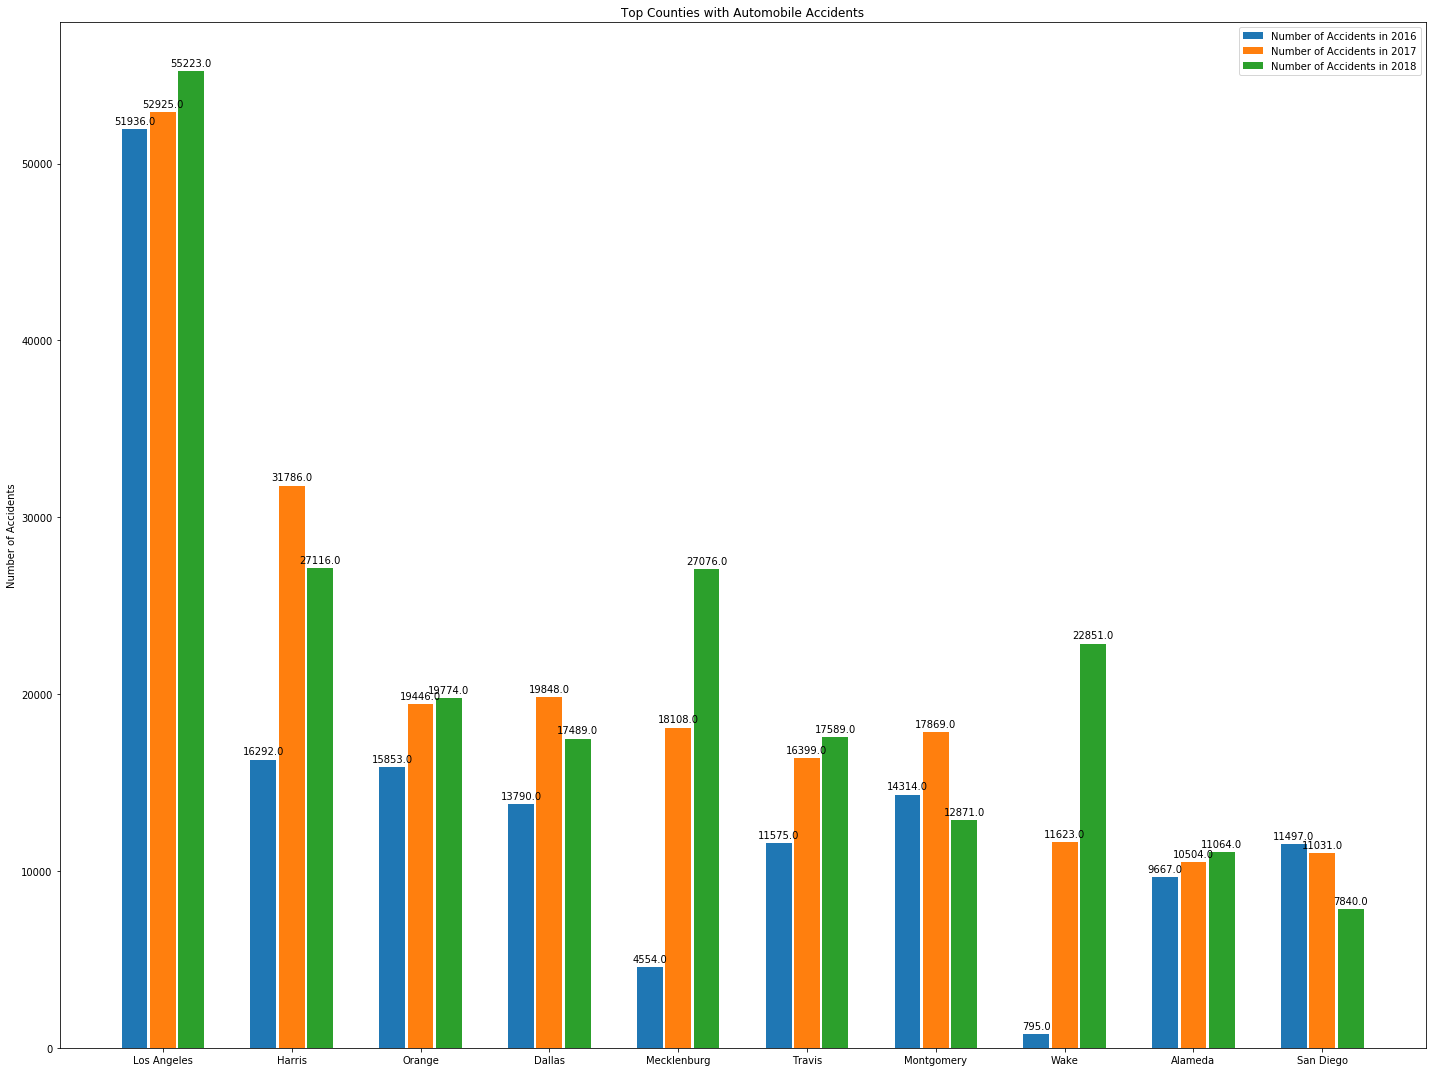

In [90]:
#set your top number here
top_number = 10

counties_tochart = dfcl_county.iloc[0:top_number, :]

labels = counties_tochart["County"]
acc_2016 = counties_tochart["Number of Accidents in 2016"]
acc_2017 = counties_tochart["Number of Accidents in 2017"]
acc_2018 = counties_tochart["Number of Accidents in 2018"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, acc_2016, width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, acc_2017, width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, acc_2018, width, label='Number of Accidents in 2018')


# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Top Counties with Automobile Accidents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("Outputs/TopCountieswithAccidents.png")
plt.show()

In [107]:
#create change over previous years... and looks like there's some data gathering issues...
dfcl_countychange = dfcl_county
dfcl_countychange["Change over last year"] = (dfcl_countychange["Number of Accidents in 2017"]-dfcl_countychange["Number of Accidents in 2016"])/dfcl_countychange["Number of Accidents in 2016"]*100
dfcl_countychange = dfcl_countychange.sort_values("Change over last year", ascending = False).reset_index(drop = True)
dfcl_countychange = dfcl_countychange.replace([np.inf, -np.inf], np.nan)
dfcl_countychange = dfcl_countychange.dropna(how='any')
dfcl_countychange
##Does not seem interesting

,County,Number of Accidents in 2016,Number of Accidents in 2017,Number of Accidents in 2018,Accidents over 3 Years,Change over last year
226,Darlington,1.0,244.0,559.0,804.0,24300.000000
227,Mobile,8.0,622.0,1974.0,2604.0,7675.000000
228,Catawba,1.0,77.0,124.0,202.0,7600.000000
229,Lafayette,41.0,3036.0,3516.0,6593.0,7304.878049
230,Tulsa,50.0,2372.0,6627.0,9049.0,4644.000000
...,...,...,...,...,...,...
1547,DeWitt,1.0,0.0,1.0,2.0,-100.000000
1548,Barton,1.0,0.0,1.0,2.0,-100.000000
1549,Sanilac,2.0,0.0,0.0,2.0,-100.000000
1550,Winchester,1.0,0.0,4.0,5.0,-100.000000


In [112]:
#Accidents by City in 2016, 2017, 2018
dfcl_city = dfcl_location[["Start_Year", "City", "ID"]]
count_city = dfcl_city.groupby(['Start_Year', 'City'])["ID"].count()
dfcl_city_year = pd.DataFrame({"Number of Accidents": count_city})
dfcl_city_year = dfcl_city_year.reset_index()

dfcl_2016_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

#Clean 2016 DataFrame
dfcl_city = dfcl_2016_city.rename(columns={"Number of Accidents": "Number of Accidents in 2016"}).drop("Start_Year", axis = 1)
#Merge and Clean 2017 DataFrame
dfcl_city = pd.merge(dfcl_city, dfcl_2017_city, how="outer", on = "City")
dfcl_city = dfcl_city.rename(columns={"Number of Accidents": "Number of Accidents in 2017"}).drop("Start_Year", axis = 1)
#Merage and Clean 2018 DataFrame
dfcl_city = pd.merge(dfcl_city, dfcl_2018_city, how="outer", on = "City")
dfcl_city = dfcl_city.rename(columns={"Number of Accidents": "Number of Accidents in 2018"}).drop("Start_Year", axis = 1)
#Fill Nan's with 0
dfcl_city = dfcl_city.fillna(0)

# #create total column
dfcl_city["Accidents over 3 Years"] = dfcl_city["Number of Accidents in 2018"] + dfcl_city["Number of Accidents in 2017"] + dfcl_city["Number of Accidents in 2016"]
dfcl_city = dfcl_city.sort_values("Accidents over 3 Years", ascending = False).reset_index(drop = True)

dfcl_city

###drill down to ca if data is available

,City,Number of Accidents in 2016,Number of Accidents in 2017,Number of Accidents in 2018,Accidents over 3 Years
0,Houston,15568.0,30288.0,25245.0,71101.0
1,Charlotte,4236.0,16827.0,25174.0,46237.0
2,Los Angeles,15066.0,15346.0,15779.0,46191.0
3,Dallas,11880.0,17220.0,14249.0,43349.0
4,Austin,10739.0,15178.0,16150.0,42067.0
...,...,...,...,...,...
10792,Eclectic,0.0,0.0,1.0,1.0
10793,New Roads,0.0,0.0,1.0,1.0
10794,Grannis,0.0,0.0,1.0,1.0
10795,Sulligent,0.0,0.0,1.0,1.0


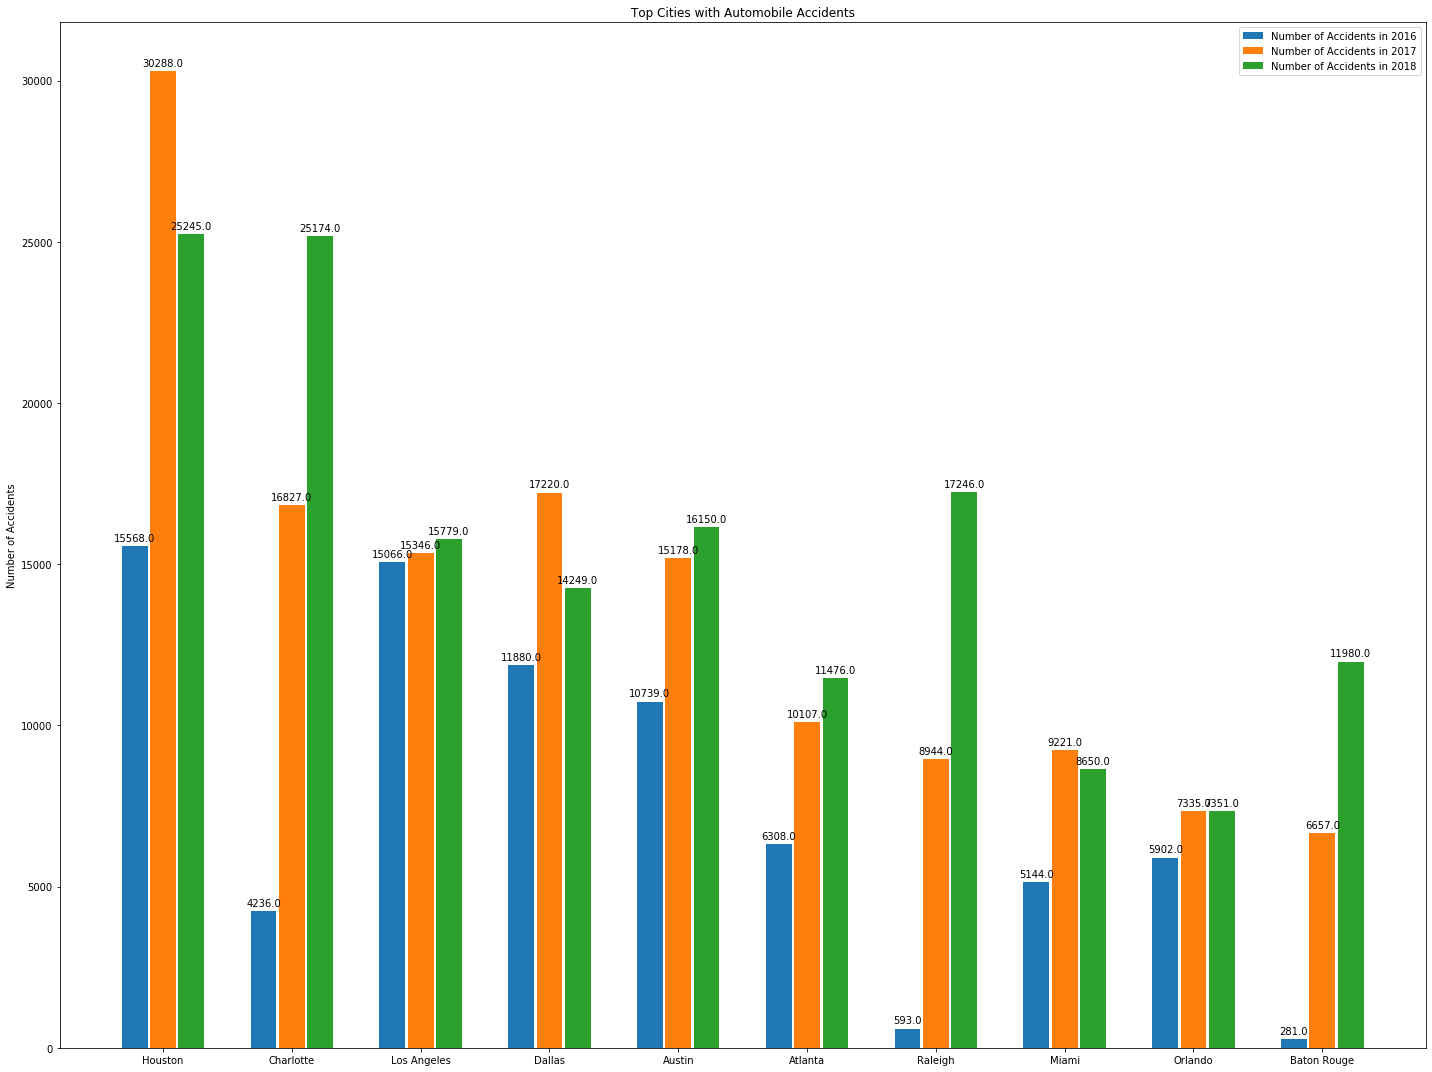

In [114]:
#set your top number here
top_number = 10

cities_tochart = dfcl_city.iloc[0:top_number, :]

labels = cities_tochart["City"]
acc_2016 = cities_tochart["Number of Accidents in 2016"]
acc_2017 = cities_tochart["Number of Accidents in 2017"]
acc_2018 = cities_tochart["Number of Accidents in 2018"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, acc_2016, width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, acc_2017, width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, acc_2018, width, label='Number of Accidents in 2018')


# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Top Cities with Automobile Accidents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("Outputs/TopCitieswithAccidents.png")
plt.show()

In [ ]:
###START HERE.
###Create the Grouped Bar for State and Timezone

In [116]:
#time of month for all years (2016 to 2018)
dfcl_month = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_month = dfcl_month.groupby('Start_Month')["ID"].count()
dfcl_month = pd.DataFrame({"Number of Accidents": count_month})
dfcl_month = dfcl_month.reset_index()
dfcl_month

dfcl_month_year = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_monthyear = dfcl_month_year.groupby(['Start_Year', 'Start_Month'])["ID"].count()
dfcl_month_year = pd.DataFrame({"Number of Accidents": count_monthyear})
dfcl_month_year = dfcl_month_year.reset_index()
dfcl_month_year

dfcl_2016_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_month
dfcl_2017_month
dfcl_2018_month

,Start_Year,Start_Month,Number of Accidents
31,2018,07,65747
30,2018,06,67787
36,2018,12,70208
26,2018,02,71463
28,2018,04,72589
33,2018,09,73283
27,2018,03,74417
25,2018,01,74999
32,2018,08,76381
29,2018,05,76477


In [118]:
###CONTINUE HERE.
#CHART MONTHS ON 3 SUBPLOTS (BY YEAR)

In [ ]:
#time of hour for all years
#time of hour for all months
#time of hour for all months, years
#times of hours for a specific years

In [ ]:
###Severity###

In [ ]:
dfcl_city = dfcl_location[["Start_Year", "City", "ID"]]
count_city = dfcl_city.groupby(['Start_Year', 'City'])["ID"].count()
dfcl_city_year = pd.DataFrame({"Number of Accidents": count_city})
dfcl_city_year = dfcl_city_year.reset_index()

dfcl_2016_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

# dfcl_2016_city
# dfcl_2017_city
# dfcl_2018_city


In [ ]:
# df_bycounty
dfcl_county = dfcl_location[["Start_Year", "County", "ID"]]
count_county = dfcl_county.groupby(['Start_Year', 'County'])["ID"].count()
dfcl_county_year = pd.DataFrame({"Number of Accidents": count_county})
dfcl_county_year = dfcl_county_year.reset_index()
# dfcl_county_year

dfcl_2016_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_county
dfcl_2017_county
dfcl_2018_county



In [ ]:
# df_bystate
dfcl_state = dfcl_location[["Start_Year", "State", "ID"]]
count_state = dfcl_state.groupby(['Start_Year', 'State'])["ID"].count()
dfcl_state_year = pd.DataFrame({"Number of Accidents": count_state})
dfcl_state_year = dfcl_state_year.reset_index()
dfcl_state_year

dfcl_2016_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_state
dfcl_2017_state
dfcl_2018_state

In [ ]:
### You can link this with driver's license data for 2016 and 17.

In [ ]:
# df_bytimezone
dfcl_timezone = dfcl_location[["Start_Year", "Timezone", "ID"]]
count_timezone = dfcl_timezone.groupby(['Start_Year', 'Timezone'])["ID"].count()
dfcl_timezone_year = pd.DataFrame({"Number of Accidents": count_timezone})
dfcl_timezone_year = dfcl_timezone_year.reset_index()
dfcl_timezone_year

dfcl_2016_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_timezone
dfcl_2017_timezone
dfcl_2018_timezone

In [ ]:
# df_by month
dfcl_month = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_month = dfcl_month.groupby('Start_Month')["ID"].count()
dfcl_month = pd.DataFrame({"Number of Accidents": count_month})
dfcl_month = dfcl_month.reset_index()
dfcl_month

dfcl_month_year = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_monthyear = dfcl_month_year.groupby(['Start_Year', 'Start_Month'])["ID"].count()
dfcl_month_year = pd.DataFrame({"Number of Accidents": count_monthyear})
dfcl_month_year = dfcl_month_year.reset_index()
dfcl_month_year

dfcl_2016_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_month
dfcl_2017_month
dfcl_2018_month

In [ ]:
# df_by hour
dfcl_hour = dfcl_location[["Start_Year", "Start_Hr", "ID"]]
count_hour = dfcl_hour.groupby('Start_Hr')["ID"].count()
dfcl_hour = pd.DataFrame({"Number of Accidents": count_hour})
dfcl_hour = dfcl_hour.reset_index()
dfcl_hour

dfcl_hour_month = dfcl_location[["Start_Hr", "Start_Month", "ID"]]
count_hourmonth = dfcl_hour_month.groupby(['Start_Month', 'Start_Hr'])["ID"].count()
dfcl_hour_month = pd.DataFrame({"Number of Accidents": count_hourmonth})
dfcl_hour_month = dfcl_hour_month.reset_index()
dfcl_hour_month

dfcl_hour_Jan =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "01", :].sort_values("Number of Accidents")
dfcl_hour_Feb =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "02", :].sort_values("Number of Accidents")
dfcl_hour_Mar =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "03", :].sort_values("Number of Accidents")
dfcl_hour_Mar

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#City
dfcl_severity_2016 = dfcl_2016_loc[["City", "Severity", "ID"]]
count_severity2016 = dfcl_severity_2016.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2016 = pd.DataFrame({"Number of Accidents": count_severity2016})
dfcl_severity_2016 = dfcl_severity_2016.reset_index()
dfcl_severity_2016_4 = dfcl_severity_2016.loc[dfcl_severity_2016["Severity"] == 4, :].sort_values("Number of Accidents")

dfcl_severity_2017 = dfcl_2017_loc[["City", "Severity", "ID"]]
count_severity2017 = dfcl_severity_2017.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2017 = pd.DataFrame({"Number of Accidents": count_severity2017})
dfcl_severity_2017 = dfcl_severity_2017.reset_index()
dfcl_severity_2017_4 = dfcl_severity_2017.loc[dfcl_severity_2017["Severity"] == 4, :].sort_values("Number of Accidents")

dfcl_severity_2018 = dfcl_2018_loc[["City", "Severity", "ID"]]
count_severity2018 = dfcl_severity_2018.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2018 = pd.DataFrame({"Number of Accidents": count_severity2018})
dfcl_severity_2018 = dfcl_severity_2018.reset_index()
dfcl_severity_2018_4 = dfcl_severity_2018.loc[dfcl_severity_2018["Severity"] == 4, :].sort_values("Number of Accidents")

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#County

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#State

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#Timezone

In [ ]:
# When do the most severe accidents occur?  (Heain) - 4
#Month

In [ ]:
# When do the most severe accidents occur?  (Heain) - 4
#Hour

In [ ]:
##Accidents by City, State, County, Timezone
##Drivers by State
##Accident by Month, Time of Day
##Accident by Severity (Cross with locale and time)

In [ ]:
#Visualize - https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [ ]:
# IDThis is a unique identifier of the accident record.
# SourceIndicates source of the accident report (i.e. the API which reported the accident.).
# TMCA traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
# SeverityShows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
# Start_Time Shows start time of the accident in local time zone.
# End_Time Shows end time of the accident in local time zone.
# Start_LatShows latitude in GPS coordinate of the start point.
# Start_LngShows longitude in GPS coordinate of the start point.
# End_LatShows latitude in GPS coordinate of the end point.
# End_LngShows longitude in GPS coordinate of the end point.
# Distance(mi)The length of the road extent affected by the accident.
# DescriptionShows natural language description of the accident.
# NumberShows the street number in address field.
# StreetShows the street name in address field.
# SideShows the relative side of the street (Right/Left) in address field.
# CityShows the city in address field.
# CountyShows the county in address field.
# StateShows the state in address field.
# ZipcodeShows the zipcode in address field.
# CountryShows the country in address field.
# TimezoneShows timezone based on the location of the accident (eastern, central, etc.).
# Airport_CodeDenotes an airport-based weather station which is the closest one to location of the accident.
# Weather_TimestampShows the time-stamp of weather observation record (in local time).
# Temperature(F)Shows the temperature (in Fahrenheit).
# Wind_Chill(F)Shows the wind chill (in Fahrenheit).
# Humidity(%)Shows the humidity (in percentage).
# Pressure(in)Shows the air pressure (in inches).
# Visibility(mi)Shows visibility (in miles).
# Wind_DirectionShows wind direction.
# Wind_Speed(mph)Shows wind speed (in miles per hour).
# Precipitation(in)Shows precipitation amount in inches, if there is any.
# Weather_ConditionShows the weather condition (rain, snow, thunderstorm, fog, etc.)
# AmenityA POI annotation which indicates presence of amenity in a nearby location.
# BumpA POI annotation which indicates presence of speed bump or hump in a nearby location.
# CrossingA POI annotation which indicates presence of crossing in a nearby location.
# Give_WayA POI annotation which indicates presence of give_way in a nearby location.
# JunctionA POI annotation which indicates presence of junction in a nearby location.
# No_ExitA POI annotation which indicates presence of no_exit in a nearby location.
# RailwayA POI annotation which indicates presence of railway in a nearby location.
# RoundaboutA POI annotation which indicates presence of roundabout in a nearby location.
# StationA POI annotation which indicates presence of station in a nearby location.
# StopA POI annotation which indicates presence of stop in a nearby location.
# Traffic_CalmingA POI annotation which indicates presence of traffic_calming in a nearby location.
# Traffic_SignalA POI annotation which indicates presence of traffic_signal in a nearby location.
# Turning_LoopA POI annotation which indicates presence of turning_loop in a nearby location.
# Sunrise_SunsetShows the period of day (i.e. day or night) based on sunrise/sunset.
# Civil_TwilightShows the period of day (i.e. day or night) based on civil twilight.
# Nautical_TwilightShows the period of day (i.e. day or night) based on nautical twilight.
# Astronomical_TwilightShows the period of day (i.e. day or night) based on astronomical twilight.